(3, 192, 192, 3)
0 255
(3, 6, 192, 192)
0.0 1.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1.0


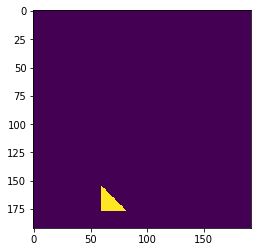

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os,sys
import matplotlib.pyplot as plt
import numpy as np
import helper
import simulation
from matplotlib.image import imread

# Generate some random images
input_images, target_masks = simulation.generate_random_data(192, 192, count=3)
# other_input_images = np.array([imread('./images/output_0_1.png'), imread('./images/output_2_2.png'), imread('./images/output_9_1.png')])
# other_target_masks = np.array([imread('./images/output_0_1.png'), imread('./images/output_2_2.png'), imread('./images/output_9_1.png')])

for x in [input_images, target_masks]:
    print(x.shape)
    print(x.min(), x.max())

# Change channel-order and make 3 channels for matplot
input_images_rgb = [x.astype(np.uint8) for x in input_images]
# print(np.array(input_images_rgb).shape)

# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in target_masks]

# Left: Input image, Right: Target mask
# helper.plot_side_by_side([input_images, target_masks_rgb])
x = target_masks[0, 2, :, :]
something = plt.imshow(x)
print(x)
print(x.max())
plt.show()

1.0
0.0


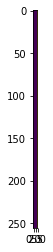

In [15]:
# ROIList = [2, 3, 41, 42]
def makeSeg(image):
    
    image = image.reshape((image.shape[0], image.shape[1], 1))
    foreground = np.zeros(image.shape)
    first = np.zeros(image.shape)
    first[image == 2] = 1
    foreground[image == 2] = 1
    second = np.zeros(image.shape)
    second[image == 3] = 1
    foreground[image == 3] = 1
    third = np.zeros(image.shape)
    third[image == 41] = 1
    foreground[image == 41] = 1
    fourth = np.zeros(image.shape)
    fourth[image == 42] = 1
    foreground[image == 42] = 1
    fifth = np.zeros(image.shape)
    fifth[foreground == 0] = 1
    
    return np.concatenate((first, second, third, fourth, fifth), axis=2)

dirs = './segmented_images/'
files = os.listdir(dirs)
# print(files[0])
segmented_images = np.array([makeSeg(np.load(dirs + str(files[i]))) for i in range(len(files))])
# print(segmented_images[0].max())
# print(segmented_images[0].min())
# print(segmented_images[0][80 : -80, 80 : -80])
x = segmented_images[0][2]
print(x.max())
print(x.min())
plt.imshow(x)
plt.show()

# dirs = '/A/'
# files = os.listdir(dirs)
# data = [imread(files[i]) for i in range(len(files))]

# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms, datasets, models

# class SimDataset(Dataset):
#     def __init__(self, count, transform=None):
#         self.input_images, self.target_masks = simulation.generate_random_data(192, 192, count=count)        
#         self.transform = transform
#         print(self.input_images.shape)
    
#     def __len__(self):
#         return len(self.input_images)
    
#     def __getitem__(self, idx):        
#         image = self.input_images[idx]
#         mask = self.target_masks[idx]
#         if self.transform:
#             image = self.transform(image)
        
#         return [image, mask]

# # use same transform for train/val for this example
# trans = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # imagenet
# ])

# train_set = SimDataset(2000, transform=trans)
# val_set = SimDataset(200, transform=trans)

# image_datasets = {
#     'train': train_set, 'val': val_set
# }

# batch_size = 25

# dataloaders = {
#     'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
#     'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
# }

# dataset_sizes = {
#     x: len(image_datasets[x]) for x in image_datasets.keys()
# }

# dataset_sizes

In [16]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models
from matplotlib.image import imread
import numpy as np
import os

# Function that reshapes the input image to have 1 as the number of channels
def makeInput(image):
    # print(image.shape)
    return image.reshape((image.shape[0], image.shape[1], 1))

# ROIList = [2, 3, 41, 42]
def makeSeg(image):
    
    image = image.reshape((1, image.shape[0], image.shape[1]))
    foreground = np.zeros(image.shape)
    first = np.zeros(image.shape)
    first[image == 2] = 1
    foreground[image == 2] = 1
    second = np.zeros(image.shape)
    second[image == 3] = 1
    foreground[image == 3] = 1
    third = np.zeros(image.shape)
    third[image == 41] = 1
    foreground[image == 41] = 1
    fourth = np.zeros(image.shape)
    fourth[image == 42] = 1
    foreground[image == 42] = 1
    fifth = np.zeros(image.shape)
    fifth[foreground == 0] = 1
    
    return np.concatenate((first, second, third, fourth, fifth), axis=0)
    

class SimDataset(Dataset):
    def __init__(self, train=True, transform=None):
        if train:
            dirs = './original_images/'
            files = os.listdir(dirs)
            # print(files[0])
            self.input_images = np.array([makeInput(np.load(dirs + str(files[i]))) for i in range(len(files))])
            # print(self.input_images.shape)
            dirs = './segmented_images/'
            files = os.listdir(dirs)
            self.target_masks = np.array([makeSeg(np.load(dirs + str(files[i]))) for i in range(len(files))])
        else:
            dirs = './validation_original_images/'
            files = os.listdir(dirs)
            self.input_images = np.array([makeInput(np.load(dirs + str(files[i]))) for i in range(len(files))])
            dirs = './validation_segmented_images/'
            files = os.listdir(dirs)
            self.target_masks = np.array([makeSeg(np.load(dirs + str(files[i]))) for i in range(len(files))])
        
        self.transform = transform
    
    def __len__(self):
        return len(self.input_images)
    
    def __getitem__(self, idx):        
        image = self.input_images[idx]
        mask = self.target_masks[idx]
        if self.transform:
            # transformation = self.transform
            image = self.transform(image)
            # mask = transformation(mask)
        
        return [image, mask]

# use same transform for train/val for this example
trans = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Resize(192), # Added this line
    # transforms.RandomCrop(180), # Added this line
    # transforms.RandomRotation(10), # Added this line
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # imagenet
])

train_set = SimDataset(train=True, transform=trans)
val_set = SimDataset(train=False, transform=trans)

image_datasets = {
    'train': train_set, 'val': val_set
}

batch_size = 25

dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
}

dataset_sizes = {
    x: len(image_datasets[x]) for x in image_datasets.keys()
}

dataset_sizes

{'train': 1500, 'val': 500}

In [17]:
import torchvision.utils

def reverse_transform(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)
    
    return inp

# Get a batch of training data
inputs, masks = next(iter(dataloaders['train']))

print(inputs.shape, masks.shape)
for x in [inputs.numpy(), masks.numpy()]:
    print(x.min(), x.max(), x.mean(), x.std())

# plt.imshow(reverse_transform(inputs)[0])

torch.Size([25, 1, 256, 256]) torch.Size([25, 5, 256, 256])
-2.1179039301310043 2.2489082969432315 -1.7080340953549602 0.7051683245442841
0.0 1.0 0.2 0.40000000000000024


In [18]:
inputs.shape

torch.Size([25, 1, 256, 256])

In [19]:
from torchvision import models

base_model = models.resnet18(pretrained=False)
    
list(base_model.children())

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bi

In [20]:
# check keras-like model summary using torchsummary
import torch
from torchsummary import summary

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
base_model = base_model.to(device)

summary(base_model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [21]:
import torch
import torch.nn as nn

def convrelu(in_channels, out_channels, kernel, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
        nn.ReLU(inplace=True),
    )

class ResNetUNet(nn.Module):

    def __init__(self, n_class):
        super().__init__()
        
        self.base_model = models.resnet18(pretrained=True)
        
        self.base_layers = list(base_model.children())                
        
        self.layersi = convrelu(1, 3,1,0)
        self.layer0 = nn.Sequential(*self.base_layers[:3]) # size=(N, 64, x.H/2, x.W/2)
        self.layer0_1x1 = convrelu(64, 64, 1, 0)
        self.layer1 = nn.Sequential(*self.base_layers[3:5]) # size=(N, 64, x.H/4, x.W/4)        
        self.layer1_1x1 = convrelu(64, 64, 1, 0)       
        self.layer2 = self.base_layers[5]  # size=(N, 128, x.H/8, x.W/8)        
        self.layer2_1x1 = convrelu(128, 128, 1, 0)  
        self.layer3 = self.base_layers[6]  # size=(N, 256, x.H/16, x.W/16)        
        self.layer3_1x1 = convrelu(256, 256, 1, 0)  
        self.layer4 = self.base_layers[7]  # size=(N, 512, x.H/32, x.W/32)
        self.layer4_1x1 = convrelu(512, 512, 1, 0)  
        
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_up3 = convrelu(256 + 512, 512, 3, 1)
        self.conv_up2 = convrelu(128 + 512, 256, 3, 1)
        self.conv_up1 = convrelu(64 + 256, 256, 3, 1)
        self.conv_up0 = convrelu(64 + 256, 128, 3, 1)
        
        self.conv_original_size0 = convrelu(3, 64, 3, 1)
        self.conv_original_size1 = convrelu(64, 64, 3, 1)
        self.conv_original_size2 = convrelu(64 + 128, 64, 3, 1)
        
        self.conv_last = nn.Conv2d(64, n_class, 1)
        
    def forward(self, input):
        layersi = self.layersi(input)
        x_original = self.conv_original_size0(layersi)
        x_original = self.conv_original_size1(x_original)
        
        layer0 = self.layer0(layersi)            
        layer1 = self.layer1(layer0)
        layer2 = self.layer2(layer1)
        layer3 = self.layer3(layer2)        
        layer4 = self.layer4(layer3)
        
        layer4 = self.layer4_1x1(layer4)
        x = self.upsample(layer4)
        layer3 = self.layer3_1x1(layer3)
        x = torch.cat([x, layer3], dim=1)
        x = self.conv_up3(x)
 
        x = self.upsample(x)
        layer2 = self.layer2_1x1(layer2)
        x = torch.cat([x, layer2], dim=1)
        x = self.conv_up2(x)

        x = self.upsample(x)
        layer1 = self.layer1_1x1(layer1)
        x = torch.cat([x, layer1], dim=1)
        x = self.conv_up1(x)

        x = self.upsample(x)
        layer0 = self.layer0_1x1(layer0)
        x = torch.cat([x, layer0], dim=1)
        x = self.conv_up0(x)
        
        x = self.upsample(x)
        x = torch.cat([x, x_original], dim=1)
        x = self.conv_original_size2(x)        
        
        out = self.conv_last(x)        
        
        return out

In [22]:
# check keras-like model summary using torchsummary

from torchsummary import summary

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ResNetUNet(5)
model = model.to(device)

summary(model, input_size=(1, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 3, 256, 256]               6
              ReLU-2          [-1, 3, 256, 256]               0
            Conv2d-3         [-1, 64, 256, 256]           1,792
              ReLU-4         [-1, 64, 256, 256]               0
            Conv2d-5         [-1, 64, 256, 256]          36,928
              ReLU-6         [-1, 64, 256, 256]               0
            Conv2d-7         [-1, 64, 128, 128]           9,408
       BatchNorm2d-8         [-1, 64, 128, 128]             128
              ReLU-9         [-1, 64, 128, 128]               0
        MaxPool2d-10           [-1, 64, 64, 64]               0
           Conv2d-11           [-1, 64, 64, 64]          36,864
      BatchNorm2d-12           [-1, 64, 64, 64]             128
             ReLU-13           [-1, 64, 64, 64]               0
           Conv2d-14           [-1, 64,

In [23]:
from collections import defaultdict
import torch.nn.functional as F
import torch
from loss import dice_loss

# Function that calculates the Jaccard overlap between two images for a given ROI
def JaccardOverlap(first, second, region):
    firstOther = np.zeros(first.shape)
    secondOther = np.zeros(second.shape)
    
    firstOther[first == region] = 1
    secondOther[second == region] = 1
    
    firstOther = firstOther.astype(bool)
    secondOther = secondOther.astype(bool)
    
    
    firstCount = np.sum(firstOther)
    secondCount = np.sum(secondOther)
    
    
    intersectionCount = np.sum(np.bitwise_and(firstOther.reshape(first.size), secondOther.reshape(second.size)))
    
    return intersectionCount / (firstCount + secondCount - intersectionCount)

def calc_loss(pred, target, metrics, bce_weight=0.5):
    bce = F.binary_cross_entropy_with_logits(pred.float(), target.float())
        
    pred = torch.sigmoid(pred)
    dice = dice_loss(pred, target)
    
    loss = bce * bce_weight + dice * (1 - bce_weight)
    
    metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)
    
    return loss

def print_metrics(metrics, epoch_samples, phase):    
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))
        
    print("{}: {}".format(phase, ", ".join(outputs)))    

def train_model(model, optimizer, scheduler, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        since = time.time()

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                for param_group in optimizer.param_groups:
                    print("LR", param_group['lr'])
                    
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            metrics = defaultdict(float) # Changed this line
            epoch_samples = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.float().to(device)
                labels = labels.float().to(device)             

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = calc_loss(outputs, labels, metrics)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                epoch_samples += inputs.size(0)

            print_metrics(metrics, epoch_samples, phase)
            epoch_loss = metrics['loss'] / epoch_samples

            # deep copy the model
            if phase == 'val' and epoch_loss < best_loss:
                print("saving best model")
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())

        time_elapsed = time.time() - since
        print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
            
    print('Best val loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [24]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

num_class = 5

model = ResNetUNet(num_class).to(device)

# freeze backbone layers
# Comment out to finetune further
for l in model.base_layers:
    for param in l.parameters():
        param.requires_grad = False

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)        
        
model = train_model(model, optimizer_ft, exp_lr_scheduler, num_epochs=15)

cpu
Epoch 0/14
----------
LR 0.0001


KeyboardInterrupt: 

In [ ]:
#### prediction

import math

model.eval()   # Set model to evaluate mode

test_dataset = SimDataset(3, transform = trans)
test_loader = DataLoader(test_dataset, batch_size=3, shuffle=False, num_workers=0)
        
inputs, labels = next(iter(test_loader))
inputs = inputs.to(device)
labels = labels.to(device)

pred = model(inputs)
pred = torch.sigmoid(pred)
pred = pred.data.cpu().numpy()
print(pred.shape)

# Change channel-order and make 3 channels for matplot
input_images_rgb = [reverse_transform(x) for x in inputs.cpu()]

# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in labels.cpu().numpy()]
pred_rgb = [helper.masks_to_colorimg(x) for x in pred]

helper.plot_side_by_side([input_images_rgb, target_masks_rgb, pred_rgb])
print('Jaccard Overlap: ', )

In [ ]:
import pandas as pd

def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

ids = []
data = []

# Assuming the outputs are stored in a list called outList
for i in range(7, len(outList) + 7):
    if (i < 15):
        ids.append(str(i) + '-left-wm') 
        data.append(rle_encode(outList[i][0]))
        ids.append(str(i) + '-left-cortex')
        data.append(rle_encode(outList[i][1]))
        ids.append(str(i) + '-right-wm')
        data.append(rle_encode(outList[i][2]))
        ids.append(str(i) + '-right-cortex')
        data.append(rle_encode(outList[i][3]))
    else:
        ids.append(str(i + 1) + '-left-wm') 
        data.append(rle_encode(outList[i][0]))
        ids.append(str(i + 1) + '-left-cortex')
        data.append(rle_encode(outList[i][1]))
        ids.append(str(i + 1) + '-right-wm')
        data.append(rle_encode(outList[i][2]))
        ids.append(str(i + 1) + '-right-cortex')
        data.append(rle_encode(outList[i][3]))

### ids: list containing the 36 IDs as described above  ###
### data: list containing the 36 binary segmentation masks in RLE format ###
df = pd.DataFrame({"Id": labels, "Predicted": data})
df.to_csv('submission.csv', index = False)